In [1]:
import pandas as pd
from great_expectations.data_context import FileDataContext
import os

print(os.getcwd())
# leave to the directory one level up
os.chdir("../")

print(os.getcwd())

/home/sshk/project/notebooks
/home/sshk/project


In [2]:
relative_path = 'data/samples/sample.csv'
df = pd.read_csv(relative_path)

In [3]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,17252255,67,https://www.zameen.com/Property/lahore_canal_v...,House,53000000,Canal View,Lahore,Punjab,31.478159,74.254017,5,2.0 Kanal,For Sale,5,07-15-2019,Sana Enterprises Real Estate,Engineer Ahtesham sb,Kanal,2.0,1-5 Kanal
1,17281578,335,https://www.zameen.com/Property/islamabad_f_17...,Flat,4400000,F-17,Islamabad,Islamabad Capital,33.631987,72.880297,2,3.6 Marla,For Sale,2,07-15-2019,NaN,NaN,Marla,3.6,0-5 Marla
2,17248355,587,https://www.zameen.com/Property/rawalpindi_kha...,House,15000,Khayaban-e-Sir Syed,Rawalpindi,Punjab,33.638847,73.048089,0,3.0 Marla,For Rent,0,07-15-2019,Mughal Property Dealer,Nadeem Mughal,Marla,3.0,0-5 Marla
3,17252060,3945,https://www.zameen.com/Property/johar_town_pha...,House,6000000,Johar Town,Lahore,Punjab,31.458466,74.292161,0,3.5 Marla,For Sale,1,07-15-2019,Faisal Associates,Mr Naveed,Marla,3.5,0-5 Marla
4,17280689,10664,https://www.zameen.com/Property/g_13_1_lifesty...,Flat,5535000,G-13,Islamabad,Islamabad Capital,33.648606,72.962353,2,6.0 Marla,For Sale,2,07-15-2019,Diamond Real Estate,Sajjad Janjua,Marla,6.0,5-10 Marla


<Axes: >

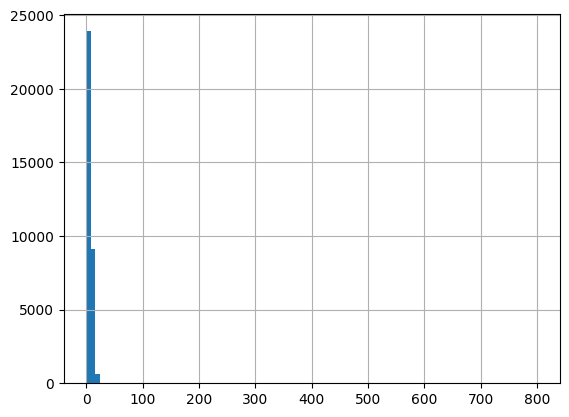

In [4]:
df['Area Size'].hist(bins=100)

In [5]:
# calculate mean and max of the price
min_price = df['price'].min()
price_25 = df['price'].quantile(0.25)
mean_price = df['price'].mean()
median_price = df['price'].median()
price_75 = df['price'].quantile(0.75)
max_price = df['price'].max()
std_dev_price = df['price'].std()
mean_price, min_price, price_25, median_price, price_75, max_price, std_dev_price

(13700183.239840897,
 1,
 90000.0,
 6500000.0,
 15000000.0,
 600000000,
 26080487.83306622)

In [6]:
min_area = df['Area Size'].min()
max_area = df['Area Size'].max()
print(round(min_area, 5), max_area)

0.0 800.0


In [7]:
min_baths = df['baths'].min()
max_baths = df['baths'].max()
min_bedrooms = df['bedrooms'].min()
max_bedrooms = df['bedrooms'].max()
min_baths, max_baths, min_bedrooms, max_bedrooms

(0, 14, 0, 28)

In [8]:
# count number of 0 in Area Size
df[df['Area Size'] == 0]


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
6461,17312326,738,https://www.zameen.com/Property/lahore_alfalah...,House,4500000,Alfalah Town,Lahore,Punjab,31.482881,74.418933,2,0.0 Marla,For Sale,2,07-16-2019,Pakistan Real Estate,Pakistan Real Estate,Marla,0.0,0-5 Marla
13073,17340289,1784,https://www.zameen.com/Property/bahria_town_ba...,House,19500000,Bahria Town,Lahore,Punjab,31.374195,74.191482,7,0.0 Marla,For Sale,5,07-17-2019,Al Ghazi Estate & Builders,Hasnain Raza Zaidi,Marla,0.0,0-5 Marla
13765,17337222,1378,https://www.zameen.com/Property/islamabad_paki...,Upper Portion,18000,Pakistan Town,Islamabad,Islamabad Capital,33.575405,73.143325,2,0.0 Marla,For Rent,2,07-17-2019,Unique Property,Kishwar Mehmood,Marla,0.0,0-5 Marla
13767,17337157,1378,https://www.zameen.com/Property/islamabad_paki...,House,35000,Pakistan Town,Islamabad,Islamabad Capital,33.575405,73.143325,4,0.0 Marla,For Rent,4,07-17-2019,Unique Property,Kishwar Mehmood,Marla,0.0,0-5 Marla
14706,17342798,718,https://www.zameen.com/Property/rawalpindi_ten...,House,5000000,Tench Bhata,Rawalpindi,Punjab,33.584665,73.035436,5,0.0 Marla,For Sale,5,07-17-2019,Gillani Real Estate & Construction,Syed Ahmed Gillani,Marla,0.0,0-5 Marla


In [9]:
# count percentage of Null values in agency
df['agency'].isnull().sum() / len(df) * 100, df['agent'].isnull().sum() / len(df) * 100

(47.35670396865446, 47.35967229659533)

<Axes: ylabel='Frequency'>

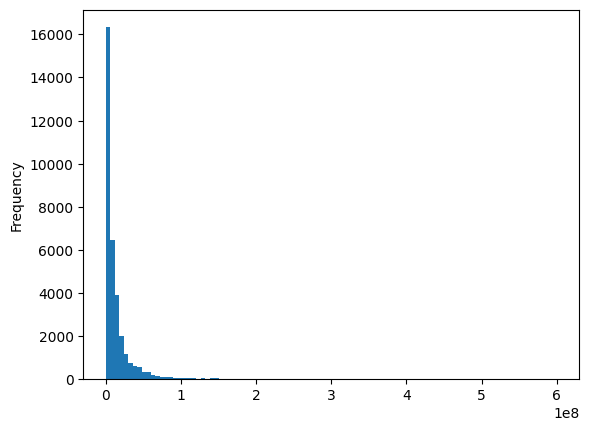

In [10]:
# plot the price distribution
df['price'].plot.hist(bins=100)

In [11]:
# count number of price == 0
df[df['price'] == 0]

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33689 entries, 0 to 33688
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    33689 non-null  int64  
 1   location_id    33689 non-null  int64  
 2   page_url       33689 non-null  object 
 3   property_type  33689 non-null  object 
 4   price          33689 non-null  int64  
 5   location       33689 non-null  object 
 6   city           33689 non-null  object 
 7   province_name  33689 non-null  object 
 8   latitude       33689 non-null  float64
 9   longitude      33689 non-null  float64
 10  baths          33689 non-null  int64  
 11  area           33689 non-null  object 
 12  purpose        33689 non-null  object 
 13  bedrooms       33689 non-null  int64  
 14  date_added     33689 non-null  object 
 15  agency         17735 non-null  object 
 16  agent          17734 non-null  object 
 17  Area Type      33689 non-null  object 
 18  Area S

In [13]:
# find distinct property types
df['property_type'].unique()

array(['House', 'Flat', 'Lower Portion', 'Upper Portion', 'Penthouse',
       'Room', 'Farm House'], dtype=object)

In [14]:
df['agency'].unique()

array(['Sana Enterprises Real Estate', nan, 'Mughal Property Dealer', ...,
       'Memon Estate', 'Moosa Estate Advisors & Builders',
       'SF Real Estate'], dtype=object)

In [15]:
df.nunique()

property_id      33689
location_id       2954
page_url         33689
property_type        7
price             1158
location          1156
city                 5
province_name        3
latitude          4495
longitude         4770
baths               15
area               259
purpose              2
bedrooms            16
date_added          44
agency            2086
agent             2667
Area Type            2
Area Size          200
Area Category       15
dtype: int64

In [16]:
df['area'].unique()

array(['2.0 Kanal', '3.6 Marla', '3.0 Marla', '3.5 Marla', '6.0 Marla',
       '1.0 Kanal', '7.5 Marla', '5.0 Marla', '7.8 Marla', '7.1 Marla',
       '10.0 Marla', '4.7 Marla', '11.0 Marla', '8.0 Marla', '4.2 Marla',
       '2.8 Marla', '5.1 Marla', '4.8 Marla', '4.4 Marla', '12.0 Marla',
       '6.4 Marla', '1.3 Kanal', '5.6 Marla', '9.3 Marla', '9.1 Marla',
       '7.0 Marla', '16.0 Marla', '10.2 Marla', '9.6 Marla', '5.8 Marla',
       '2.2 Marla', '6.2 Marla', '1.2 Kanal', '4.9 Marla', '2.9 Marla',
       '3.8 Marla', '2.3 Marla', '4.0 Marla', '5.3 Marla', '7.6 Marla',
       '4.5 Marla', '16.6 Marla', '2.5 Marla', '2.0 Marla', '9.0 Marla',
       '5.5 Marla', '10.7 Marla', '10.9 Marla', '13.0 Marla', '4.0 Kanal',
       '6.7 Marla', '14.2 Marla', '3.2 Marla', '1.8 Marla', '1.6 Kanal',
       '2.7 Marla', '6.1 Marla', '9.8 Marla', '1.8 Kanal', '3.1 Marla',
       '3.3 Marla', '2.4 Marla', '8.0 Kanal', '5.2 Marla', '14.0 Marla',
       '3.9 Marla', '1.9 Marla', '11.8 Marla', '11.5 

In [17]:
context = FileDataContext(context_root_dir = "services/gx")
context

{
  "anonymous_usage_statistics": {
    "enabled": true,
    "usage_statistics_url": "https://stats.greatexpectations.io/great_expectations/v1/usage_statistics",
    "data_context_id": "0130baae-afdd-427c-9cf0-7472caa4256b",
    "explicit_id": true,
    "explicit_url": false
  },
  "checkpoint_store_name": "checkpoint_store",
  "config_variables_file_path": "uncommitted/config_variables.yml",
  "config_version": 3.0,
  "data_docs_sites": {
    "local_site": {
      "class_name": "SiteBuilder",
      "show_how_to_buttons": true,
      "store_backend": {
        "class_name": "TupleFilesystemStoreBackend",
        "base_directory": "uncommitted/data_docs/local_site/"
      },
      "site_index_builder": {
        "class_name": "DefaultSiteIndexBuilder"
      }
    }
  },
  "datasources": {},
  "evaluation_parameter_store_name": "evaluation_parameter_store",
  "expectations_store_name": "expectations_store",
  "fluent_datasources": {
    "first_ds": {
      "type": "pandas",
      "assets

In [18]:
from pathlib import Path

ds = context.sources.add_or_update_pandas(name="first_ds")

da = ds.add_csv_asset(
    name = "asset01",
    filepath_or_buffer="data/samples/sample.csv",

)

In [19]:
batch_request = da.build_batch_request()

batches = da.get_batch_list_from_batch_request(batch_request)


In [20]:
# use head to get the first 5 rows
data_asset = context.get_datasource("first_ds").get_asset("asset01")
batch_request = data_asset.build_batch_request()

In [21]:
# create expectations
context.add_or_update_expectation_suite("first_phase_expectation_suite")
context.list_expectation_suite_names()


['features_expectations_suite', 'first_phase_expectation_suite']

In [22]:
# Create a validator
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="first_phase_expectation_suite",
)
print(validator.head())


Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

   property_id  location_id  \
0     17252255           67   
1     17281578          335   
2     17248355          587   
3     17252060         3945   
4     17280689        10664   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/lahore_canal_v...         House  53000000   
1  https://www.zameen.com/Property/islamabad_f_17...          Flat   4400000   
2  https://www.zameen.com/Property/rawalpindi_kha...         House     15000   
3  https://www.zameen.com/Property/johar_town_pha...         House   6000000   
4  https://www.zameen.com/Property/g_13_1_lifesty...          Flat   5535000   

              location        city      province_name   latitude  longitude  \
0           Canal View      Lahore             Punjab  31.478159  74.254017   
1                 F-17   Islamabad  Islamabad Capital  33.631987  72.880297   
2  Khayaban-e-Sir Syed  Rawalpindi             Punjab  33.638847  73.048089   
3           Joha

In [23]:
# create expectations
# 7 most important features:
#  price, location, area, agency, baths, bedrooms, property_type
# 3 most important dimensions per each
ex_number_of_rows = validator.expect_table_row_count_to_be_between(min_value=33687, max_value=33690)

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
assert ex_number_of_rows['success']

In [25]:
# price
ex_price_completeness = validator.expect_column_values_to_not_be_null(
	column="price", 
    meta = {"dimension": "Completeness"}
)

ex_price_validity = validator.expect_column_values_to_be_of_type(
    column="price", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_price_accuracy = validator.expect_column_min_to_be_between(
    column="price", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

price_25 = 120000.0
price75 = 19800000.0
ex_price_timelessness = validator.expect_column_median_to_be_between(
    column="price", 
    min_value=price_25, 
    max_value=price_75, 
    meta = {"dimension": "Timelessness"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
assert ex_price_completeness['success']
assert ex_price_validity['success']
assert ex_price_accuracy['success']
assert ex_price_timelessness['success']

In [27]:
# list of known locations
list_of_known_locations = df['location'].unique()
list_of_known_locations = [str(location) for location in list_of_known_locations if str(location) != 'nan']

In [28]:
# location
ex_location_completeness = validator.expect_column_values_to_not_be_null(
    column="location", 
    meta = {"dimension": "Completeness"}
)

ex_location_validity = validator.expect_column_values_to_be_of_type(
    column="location", 
    type_="str", 
    meta = {"dimension": "Validity"}
)


ex_location_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="location", 
    min_value=700, 
    max_value=1500, 
    meta = {"dimension": "Uniqueness"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
assert ex_location_completeness['success']
assert ex_location_validity['success']
assert ex_location_uniqueness['success']

In [30]:
import re
regex = r"^[0-9]+\s*(Kanal|Marla)$"
example = "1 Kanal"
assert re.match(regex, example)

In [31]:
# area
ex_area_completeness = validator.expect_column_values_to_not_be_null(
    column="area", 
    meta = {"dimension": "Completeness"}
)

ex_area_validity = validator.expect_column_values_to_match_regex(
    column="area", 
    # format = {number} {unit}
    regex=r"^[0-9]+(\.[0-9])?\s*(Kanal|Marla)$",
    meta = {"dimension": "Validity"}
)

# value of area should be greater than 0
ex_area_accuracy = validator.expect_column_min_to_be_between(
    column="Area Size", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
assert ex_area_completeness['success']
assert ex_area_validity['success']
assert ex_area_accuracy['success']
# ex_area_validity

In [33]:
list_of_known_agencies = df['agency'].unique()
list_of_known_agencies = [str(agency) for agency in list_of_known_agencies if str(agency) != 'nan']

In [34]:
ex_agency_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="agency", 
    min_value=2000, 
    max_value=5000, 
    meta = {"dimension": "Uniqueness"}
)


ex_agency_validity = validator.expect_column_values_to_be_of_type(
    column="agency", 
    type_="str", 
    meta = {"dimension": "Validity"}
)

ex_agency_completeness = validator.expect_column_values_to_not_be_null(
    column="agency", 
    mostly=0.5,
    meta = {"dimension": "Completeness"}
)
    

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

In [35]:
assert ex_agency_uniqueness['success']
assert ex_agency_validity['success']
assert ex_agency_completeness['success']

In [36]:
# baths
ex_baths_accuracy = validator.expect_column_min_to_be_between(
    column="baths", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

ex_baths_validity = validator.expect_column_values_to_be_of_type(
    column="baths", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_baths_timelessness = validator.expect_column_max_to_be_between(
    column="baths", 
    max_value=30, 
    meta = {"dimension": "Timelessness"}
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
assert ex_baths_accuracy['success']
assert ex_baths_validity['success']
assert ex_baths_timelessness['success']
# ex_baths_timelessness

In [38]:
# bedrooms
ex_bedrooms_accuracy = validator.expect_column_min_to_be_between(
    column="bedrooms", 
    min_value=0, 
    meta = {"dimension": "Accuracy"}
)

ex_bedrooms_validity = validator.expect_column_values_to_be_of_type(
    column="bedrooms", 
    type_="int64", 
    meta = {"dimension": "Validity"}
)

ex_bedrooms_timelessness = validator.expect_column_max_to_be_between(
    column="bedrooms", 
    max_value=70, 
    meta = {"dimension": "Consistency"}
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
assert ex_bedrooms_accuracy['success']
assert ex_bedrooms_validity['success']
assert ex_bedrooms_timelessness['success']
# ex_bedrooms_timelessness

In [40]:
# property_type

ex_property_type_timelessness_and_consistency_and_validity = validator.expect_column_distinct_values_to_be_in_set(
    column="property_type", 
    value_set=["House", "Penthouse", "Flat", "Farm House", "Upper Portion", "Lower Portion", "Room"],
    meta = {"dimension": "Timelessness and Consistency and Validity"}
)

ex_property_type_completeness = validator.expect_column_values_to_not_be_null(
    column="property_type", 
    meta = {"dimension": "Completeness"}
)

ex_property_type_uniqueness = validator.expect_column_unique_value_count_to_be_between(
    column="property_type", 
    min_value=5, 
    max_value=9, 
    meta = {"dimension": "Uniqueness"}
)



Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
assert ex_property_type_timelessness_and_consistency_and_validity['success']
assert ex_property_type_completeness['success']
assert ex_property_type_uniqueness['success']

In [42]:

validator.save_expectation_suite(
	discard_failed_expectations = False
)

In [43]:
# create a checkpoint to validate the data

checkpoint = context.add_or_update_checkpoint(
    name="first_phase_checkpoint",
    validations=[ # A list of validations
        {
            "batch_request": batch_request,
            "expectation_suite_name": "first_phase_expectation_suite",
        },
    ],
)

In [44]:
# validate the data
results = checkpoint.run()

Calculating Metrics:   0%|          | 0/54 [00:00<?, ?it/s]

In [45]:
results.success

True

In [46]:
# Build the data docs (website files)
context.build_data_docs()

# Open the data docs in a browser
context.open_data_docs()

In [47]:
retrieved_checkpoint = context.get_checkpoint(name="first_phase_checkpoint")

gio: file:///home/sshk/project/services/gx/uncommitted/data_docs/local_site/index.html: No application is registered as handling this file
